In [2]:
setwd('/import/liujing/data2/')

In [3]:
d1 =read.csv('./sample75.diffgene.csv',row.names = 2)
d2 =read.csv('./sample35.diffgene.csv',row.names = 2)

In [4]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
d1.up = d1 %>%  dplyr::filter(group == 'Up') %>% rownames()
d2.up = d2 %>%  dplyr::filter(group == 'Up')%>% rownames()

In [6]:
intersect(d1.up,d2.up)

[1] "RASD2"   "TFEC"    "RPL34"   "CLEC2B"  "CSTA"    "EVI2A"   "IGJ"    
 [8] "TXN"     "LPAR6"   "BCL2A1"  "1-Mar"   "POLR2K"  "XRCC4"   "ZNF208" 
[15] "ZNF354A" "SCN9A"   "LSM3"    "GAPT"    "SUMO4"   "TAF7"    "SYCP2"  
[22] "ZNF480"  "SAMD9"   "ZBED5"   "FAM200B"

In [7]:
length(intersect(d1.up,d2.up))

[1] 25

In [8]:
d1.down = d1 %>%  dplyr::filter(group == 'Down') %>% rownames()
d2.down = d2 %>%  dplyr::filter(group == 'Down')%>% rownames()

In [9]:
length(intersect(d1.down,d2.down))

[1] 46

In [10]:
intersect(d1.down,d2.down)

[1] "BZRAP1"   "OSBPL7"   "CACNA2D2" "OSBPL5"   "SH2D2A"   "VCL"     
 [7] "ARHGAP6"  "PITPNM2"  "ARVCF"    "IL2RB"    "MLC1"     "FSD1"    
[13] "ATP1A3"   "PTPRS"    "ATG2A"    "GNLY"     "NID1"     "PILRB"   
[19] "BAI2"     "KIR2DL1"  "FOSB"     "SPOCD1"   "TLN1"     "STON2"   
[25] "KIFC3"    "ERBB2"    "DAB2"     "BMP6"     "PCDH1"    "DUSP2"   
[31] "SPON2"    "LMNA"     "MAP1A"    "DDIT4"    "SH3TC2"   "CLSTN1"  
[37] "CARNS1"   "HCFC1"    "PER1"     "PRF1"     "F2R"      "FLNA"    
[43] "PDGFA"    "NCR3"     "GPR56"    "MT-ND4L"

### 去掉MT-ND4L 1-Mar

### https://www.jianshu.com/p/677e088cc732

In [11]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


In [12]:
set1 = c(d1.up,d1.down)

In [13]:
set2 = c(d2.up,d2.down)

In [14]:
s1 <- list(cohort1 = set1, 
           cohort2 = set2)

In [15]:
v1 <- venn.diagram(x = s1, 
                   filename = NULL, # 直接给一个名称会自动保存文件到本地
                   # 输出的图形参数
                   # imagetype = "png", # 输出图片类型(tiff,png,svg)
                   # height = 1000, # 图片高度
                   # width = 1000, # 图片宽度
                   # resolution = 300, # 图片分辨率
                   
                   scaled = T, # 根据比例显示大小
                   alpha=c(0.8, 0.8), # 设置每个区块的透明度
                   
                   ## 下面是除了标题外，图形其他元素的设置参数
                   # 图形元素设置：圈
                   lwd = 1, # 圆圈线条的粗细：1 2 3 4 5 6
                   lty = 1, # 圆圈线条的类型：1为实线，2为虚线，blank为无线条
                   col = c("black","red"), # 圆圈线条颜色
                   fill = c("#FFBF80", "#A1E6BF"),  # 圆圈颜色
                   
                   # 图形元素设置：数字
                   cex = 1, # 数字大小
                   fontface = "bold", # 加粗
                   fonrfamily = "sans", # 数字字体
                  
                   
                   # 图形元素设置：标签即(category)
                   cat.cex = 1,  # 标签字体大小
                   cat.col = "black",  # 标签字体色
                   cat.fontface = "bold",  # 加粗
                   cat.default.pos = "outer",  # 标签内外位置, 在圆圈内还是圆圈外，outer 内 text 外
                   cat.pos = c(0, 0),  # 标签旋转位置，用圆的度数
                   cat.dist = c(0.05,0.03),  # 标签离圆圈位置,离圆的距离，如果标签与圆圈重叠，可以调整这个参数
                   cat.fontfamily = "sans",  # 标签字体
                   )


In [16]:
pdf('figure.venn.pdf',width = 6,height = 6)
cowplot::plot_grid(v1)
dev.off()

png 
  2

In [17]:
load('cohort1.rda')

In [18]:
jiaoji = intersect(set1,set2)

In [19]:
jiaoji

[1] "RASD2"     "TFEC"      "RPL34"     "CLEC2B"    "CSTA"      "EVI2A"    
 [7] "IGJ"       "TXN"       "LPAR6"     "BCL2A1"    "1-Mar"     "POLR2K"   
[13] "XRCC4"     "ZNF208"    "ZNF354A"   "SCN9A"     "LSM3"      "GAPT"     
[19] "SUMO4"     "TAF7"      "SYCP2"     "ZNF480"    "SAMD9"     "ZBED5"    
[25] "FAM200B"   "BZRAP1"    "OSBPL7"    "CACNA2D2"  "OSBPL5"    "SH2D2A"   
[31] "VCL"       "ARHGAP6"   "PITPNM2"   "ARVCF"     "IL2RB"     "MLC1"     
[37] "FSD1"      "ATP1A3"    "PTPRS"     "ATG2A"     "GNLY"      "NID1"     
[43] "PILRB"     "BAI2"      "KIR2DL1"   "FOSB"      "SPOCD1"    "TLN1"     
[49] "STON2"     "KIFC3"     "ERBB2"     "DAB2"      "BMP6"      "PCDH1"    
[55] "DUSP2"     "SPON2"     "LMNA"      "MAP1A"     "DDIT4"     "SH3TC2"   
[61] "CLSTN1"    "CARNS1"    "HCFC1"     "PER1"      "PRF1"      "F2R"      
[67] "FLNA"      "PDGFA"     "HIST1H2BE" "NCR3"      "GPR56"     "MT-ND4L"

In [20]:
forplot = expr[jiaoji,]
library(pheatmap)
#forplot = na.omit(forplot)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 72 74

In [21]:
dat = dat[-c(68,71),]

In [22]:
options(repr.plot.width = 6,repr.plot.height = 6)

In [23]:
library(pheatmap)
annotation_col = data.frame( c(rep('con',31),rep('CI',43)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
RASD2,-0.00896066,-0.1832665,-0.1832665,-0.1832665,0.1329898,-0.1832665,-0.1832665,-0.1832665,-0.1832665,-0.1832665,...,1.162089,-0.1832665,-0.1832665,-0.1832665,-0.001998008,-0.1832665,-0.1832665,-0.1832665,-0.1832665,-0.1832665
TFEC,-0.28129689,0.3887138,0.3544721,-0.3483068,-0.9218059,0.2427618,-0.6378249,-0.8696575,-0.9573238,-0.5066831,...,2.000000,-0.3657296,-0.1644054,0.8472076,-0.705064584,-0.6882182,-1.1098204,-0.8330578,-0.2475411,1.6950939


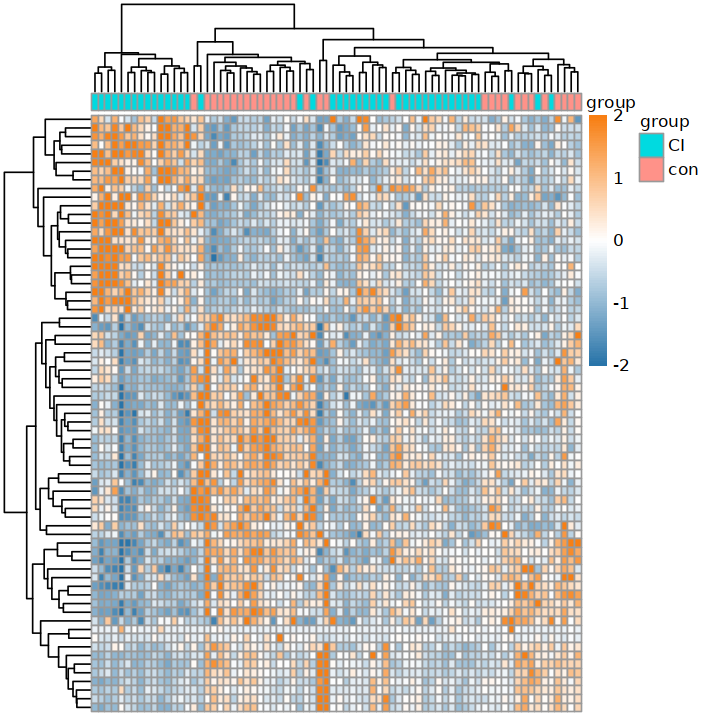

In [24]:
 x  = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [25]:
pdf('figure1.heatmap.pdf',height = 6,width = 7)
x
dev.off()

png 
  2

In [26]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [27]:
jiaoji

[1] "RASD2"     "TFEC"      "RPL34"     "CLEC2B"    "CSTA"      "EVI2A"    
 [7] "IGJ"       "TXN"       "LPAR6"     "BCL2A1"    "1-Mar"     "POLR2K"   
[13] "XRCC4"     "ZNF208"    "ZNF354A"   "SCN9A"     "LSM3"      "GAPT"     
[19] "SUMO4"     "TAF7"      "SYCP2"     "ZNF480"    "SAMD9"     "ZBED5"    
[25] "FAM200B"   "BZRAP1"    "OSBPL7"    "CACNA2D2"  "OSBPL5"    "SH2D2A"   
[31] "VCL"       "ARHGAP6"   "PITPNM2"   "ARVCF"     "IL2RB"     "MLC1"     
[37] "FSD1"      "ATP1A3"    "PTPRS"     "ATG2A"     "GNLY"      "NID1"     
[43] "PILRB"     "BAI2"      "KIR2DL1"   "FOSB"      "SPOCD1"    "TLN1"     
[49] "STON2"     "KIFC3"     "ERBB2"     "DAB2"      "BMP6"      "PCDH1"    
[55] "DUSP2"     "SPON2"     "LMNA"      "MAP1A"     "DDIT4"     "SH3TC2"   
[61] "CLSTN1"    "CARNS1"    "HCFC1"     "PER1"      "PRF1"      "F2R"      
[67] "FLNA"      "PDGFA"     "HIST1H2BE" "NCR3"      "GPR56"     "MT-ND4L"

In [28]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "BP",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"9.72% of input gene IDs are fail to map..."


In [29]:
#  BP %>% filter(ONTOLOGY	 == 'BP') %>% head(5) -> bp
#  BP %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
#  BP %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf

# go = rbind(bp,cc,mf)

# library(ggplot2)
# library(RColorBrewer)
# display.brewer.all()
# color <- brewer.pal(3,"Dark2")
# colorl <- rep(color,each=5)
# go$Description<- factor(go$Description,levels=go$Description)

# options(repr.plot.width = 8)

# ggplot(go) +
#   aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip() + 
#   geom_bar(stat = "identity",colour="black") +
#   #scale_fill_hue() +
#   scale_fill_manual(values =color)+
#   theme(
#     axis.title=element_text(size=15,face="plain",color="black"),
#     axis.text = element_text(size=12,face="plain",color="black"),
#     axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
#     axis.title.x = element_blank(),
#     legend.title = element_blank(),
#     legend.text = element_text(size = 8, face = "bold"),
#     legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
#     legend.direction = "horizontal",
#     legend.position = c(0.8,0.9),
#     legend.background = element_blank(),
#     panel.background = element_rect(fill = "transparent",colour = "black"),
    
#     plot.background = element_blank()
#   )


In [30]:
options(repr.plot.width = 9)

In [31]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


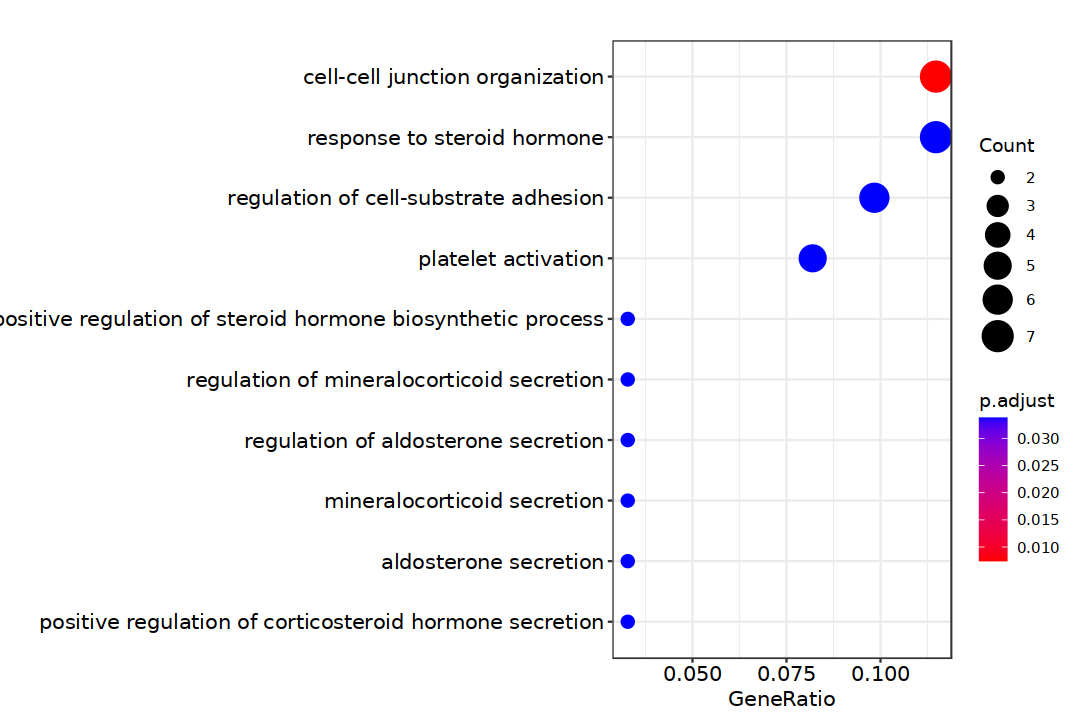

In [32]:
dotplot(BP,showCategory = 10,label_format = 100)
ggsave('Figure1.69gene.GO.pdf',width = 9,height = 6)

In [33]:
gene = gene_symbol$ENTREZID

In [34]:
kk <- enrichKEGG(gene = gene,keyType = "kegg",organism= "human", qvalueCutoff = 0.05, pvalueCutoff=0.05)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



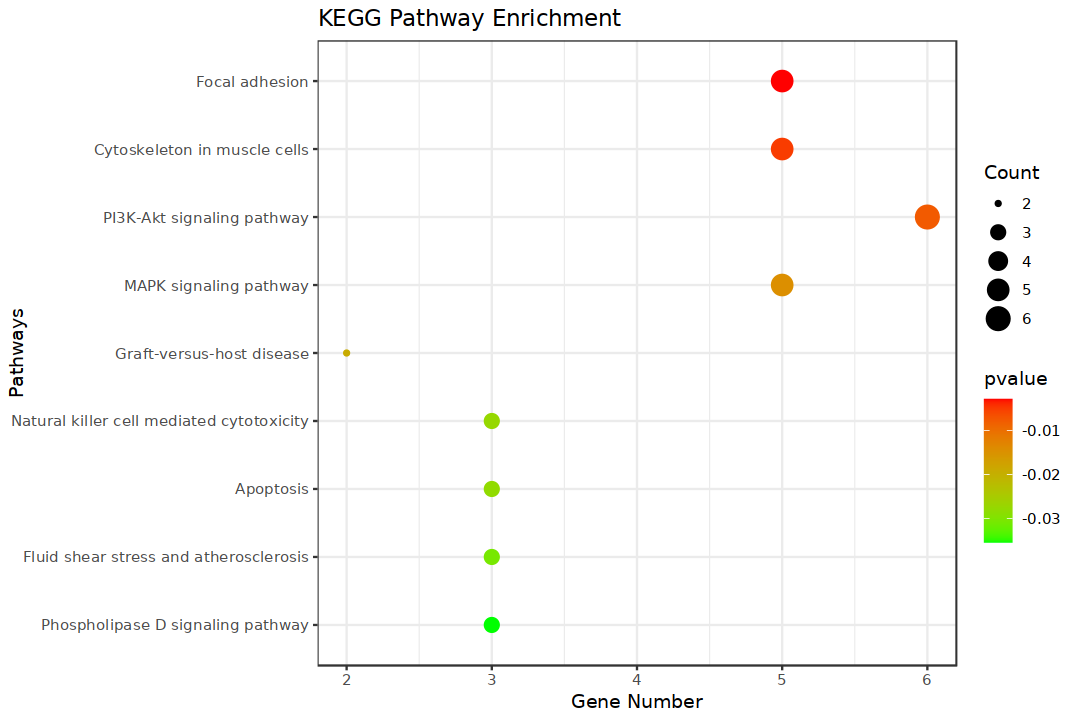

In [44]:
hh <- as.data.frame(kk@result[1:9,])
rownames(hh) <- 1:nrow(hh)
hh$order=factor(rev(as.integer(rownames(hh))),labels = rev(hh$Description))
ggplot(hh,aes(y=order,x=Count))+
geom_point(aes(size=Count,color=-1*pvalue))+# 修改点的大小
scale_color_gradient(low="green",high = "red")+
labs(color=expression(pvalue,size="Count"), 
     x="Gene Number",y="Pathways",title="KEGG Pathway Enrichment")+
theme_bw()

In [40]:
ggsave('Figure1.69gene.KEGG.pdf',width = 8,height = 8)